# Created By : Andrean Yonathan

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [15]:
df = pd.read_csv("data.csv", encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Pre-processing

## Check Data Type

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Things to do:
1. Check and drop duplicate
2. Check and imputation missing value
3. Convert into correct data type
4. Extract `month` column

# Check and Drop Duplicate

In [18]:
# check duplicate
print(f"Number of duplicate row: {df.duplicated().sum()}")

Number of duplicate row: 5268


In [19]:
# remove duplicate
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


## Check and Imputation Missing Values

In [20]:
# check missing value
print(f"Number of missing value: {df.isna().sum()}")

Number of missing value: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [21]:
# imputation
# CustomerID: NaN -> unknown
# Description: NaN -> unknown

df = df.fillna('unknown')
print(f"Number of missing value: {df.isna().sum()}")

Number of missing value: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Convert `InvoiceDate` to datetime

In [22]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


## Add `Month_InvoiceDate`

In [23]:
df["Cohort"] = df["InvoiceDate"].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


# Co-hort and Retention Analysis

## Create co-hort

In [26]:
cohort = df.groupby('Cohort').count()[['CustomerID']]
cohort.rename(columns = {'CustomerID':'TotalCustomer'},inplace = True)
cohort

,TotalCustomer
Cohort,
2010-12,41981
2011-01,34900
2011-02,27479
2011-03,36439
2011-04,29701
2011-05,36782
2011-06,36609
2011-07,39267
2011-08,35064


## First transaction per customer

In [27]:
firstCohort = df.groupby('CustomerID').min()[['Cohort']]
firstCohort.rename(columns = {'Cohort':'FirstDate'}, inplace = True)
firstCohort.sort_values('FirstDate')

,FirstDate
CustomerID,
15301.0,2010-12
15246.0,2010-12
15240.0,2010-12
15235.0,2010-12
15224.0,2010-12
...,...
12367.0,2011-12
15471.0,2011-12
15097.0,2011-12


## Retention Analysis

In [32]:
df_retention = df.merge(firstCohort, on = 'CustomerID', how = 'left')
# df_retention['Interval'] = df['MonthInvoiceDate'] - df['FirstDate']
df_retention

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cohort,FirstDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,2011-08
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,2011-08
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,2011-08


In [63]:
df_retention['Interval'] = df_retention['Cohort'].astype(int) - df_retention['FirstDate'].astype(int)
df_retention.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cohort,FirstDate,Interval
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,0


### Pivot table

In [149]:
retention = pd.pivot_table(data = df_retention,
                           index = 'FirstDate',
                           columns = 'Interval',
                           values = 'CustomerID',
                           aggfunc = pd.Series.nunique)
retention

Interval,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstDate,,,,,,,,,,,,,
2010-12,949.0,363.0,318.0,368.0,342.0,377.0,361.0,337.0,337.0,375.0,355.0,475.0,261.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# percent retention
percent_retention = retention.copy()
base = percent_retention[0]

for col in percent_retention.columns:
    percent = percent_retention[col]/base
    percent *= 100
    percent_retention[col] = np.round(percent, 2)

mean = []
for col in percent_retention.columns:
    mean_retention = percent_retention.iloc[col][1:].mean()
    mean.append(np.round(mean_retention, 2))
percent_retention['average'] = mean

percent_retention

Interval,0,1,2,3,4,5,6,7,8,9,10,11,12,average
FirstDate,,,,,,,,,,,,,,
2010-12,100.0,38.25,33.51,38.78,36.04,39.73,38.04,35.51,35.51,39.52,37.41,50.05,27.5,37.49
2011-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN,28.05
2011-02,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN,24.34
2011-03,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN,21.69
2011-04,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN,20.99
2011-05,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN,20.12
2011-06,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN,22.55
2011-07,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.63
2011-08,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.30


## Create Heatmap

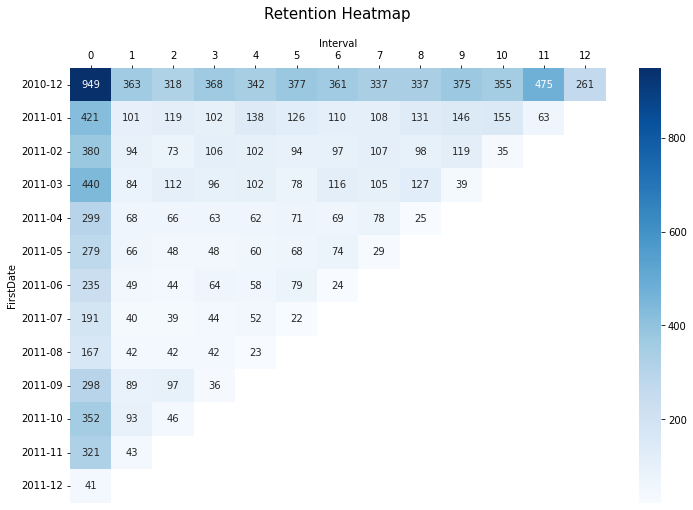

In [123]:
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(retention, annot = True, fmt='.0f', cmap = 'Blues')
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title('Retention Heatmap', fontsize = 15, pad = 20)
plt.show()

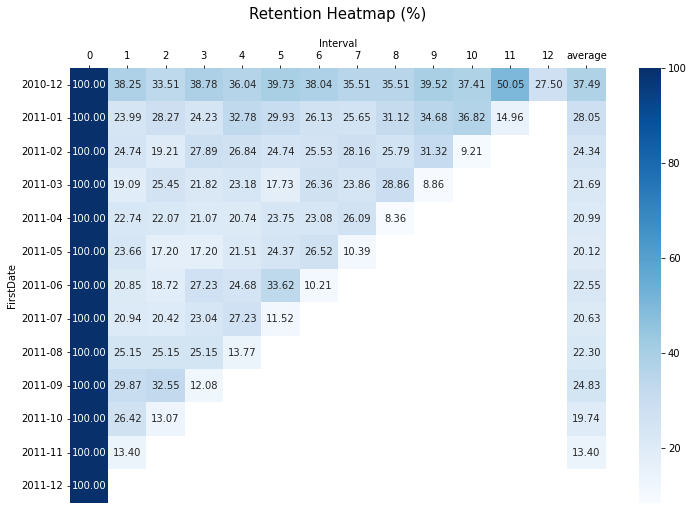

In [154]:
plt.figure(figsize = (12,8))
sns.heatmap(percent_retention, annot = True, fmt='.2f', cmap = 'Blues')
ax = plt.gca()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.title('Retention Heatmap (%)', fontsize = 15, pad = 20)
plt.show()

# Insight

1. Customer pada cohort `2010-12` memiliki loyalitas yang paling tinggi yang ditunjukkan dengan nilai retensi setiap bulan setelah transaksi pertama yang memiliki rata-rata sebesar `37.49%`

2. Sebagian besar cohort memiliki rata-rata retensi setiap bulan setelah transaksi pertama berkisar pada angka `20% - 28%`

3. Jumlah customer semua cohort yang melakukan transaksi di bulan Desember 2011 mengalami penurunan bahkan ada yang di bawah `10%`. Hal ini dapat menjadi perhatian untuk dapat meningkatkan pembelian di akhir tahun. Saran yang dapat dilakukan adalah memberikan promo di akhir tahun untuk customer khususnya menjelang perayaan Natal dan Tahun Baru.